In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import f1_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

from sklearn.impute import KNNImputer

oTrainData = pd.read_csv('/content/train.csv')
#Limpiamos espacios de columnas
#oTrainData = oTrainData.str.replace(' ', '')
#oTrainData['Age'] = pd.to_numeric(oTrainData['Age'])
#oTrainData[['PassengerId', 'Survived', 'Pclass',  'Age', 'SibSp', 'Parch',  'Fare']] = oTrainData[['PassengerId', 'Survived', 'Pclass',  'Age', 'SibSp', 'Parch',  'Fare']].apply(pd.to_numeric)
#oTrainData[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']] = oTrainData[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']].astype(str)
print(oTrainData.describe())

#print( oTrainData.isnull())
oMissingValues = oTrainData.isnull().sum()
print("Valores faltantes por columna:")
print(oMissingValues)


oCleanData = oTrainData[~oTrainData['Age'].isnull()]
oCleanData.index = range(len(oCleanData))
#oCleanData['Survived'] = oCleanData['Survived'].map({'female': 1, 'male': 0})
print(oCleanData[0:6])

oTrainData = pd.read_csv('/content/train.csv')
oCleanData = oTrainData[~oTrainData['Age'].isnull()]
oCleanData["Sex"] = oCleanData["Sex"].map({'female': 1, 'male': 0})

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(oTrainData, test_size=0.2, random_state=42)

oCleantrain_data, oCleantest_data = train_test_split(oCleanData, test_size=0.2, random_state=42)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Valores faltantes por columna:
PassengerId      0
Survived         0
Pclass      

<ipython-input-158-947f9796ed9d>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oCleanData["Sex"] = oCleanData["Sex"].map({'female': 1, 'male': 0})


## Regresiones lineal (Parch)

Mean Squared Error:  170.8143416297778


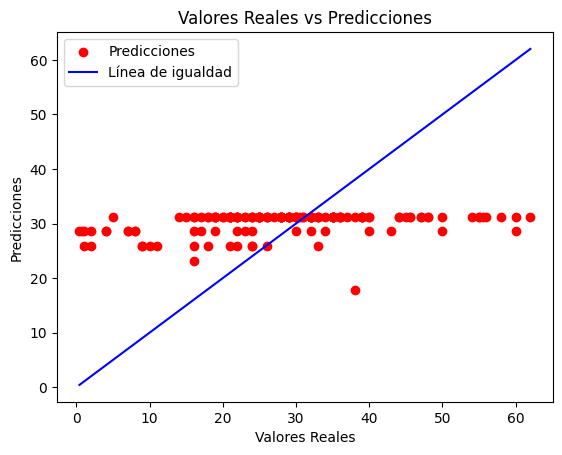

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
train_x, test_x, train_y, test_y = train_test_split(oCleanData[["Parch"]], oCleanData["Age"], test_size=0.2)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(train_x, train_y)

# Realizar predicciones
y_pred = model.predict(test_x)

# Evaluar el modelo
mse = mean_squared_error(test_y, y_pred)
print("Mean Squared Error: ", mse)

# Graficar las predicciones vs los valores reales
plt.scatter(test_y, y_pred, color='red', label='Predicciones')
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], color ='blue', label = "Línea de igualdad")
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.legend()
plt.show()

## Regresiones lineal (SibSp)

Mean Squared Error:  182.4712904279988


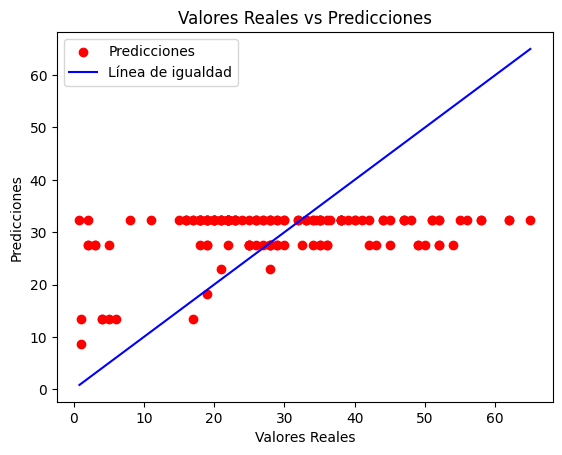

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
train_x, test_x, train_y, test_y = train_test_split(oCleanData[["SibSp"]], oCleanData["Age"], test_size=0.2)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(train_x, train_y)

# Realizar predicciones
y_pred = model.predict(test_x)

# Evaluar el modelo
mse = mean_squared_error(test_y, y_pred)
print("Mean Squared Error: ", mse)

# Graficar las predicciones vs los valores reales
plt.scatter(test_y, y_pred, color='red', label='Predicciones')
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], color ='blue', label = "Línea de igualdad")
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.legend()
plt.show()

## Regresiones lineal (Famila)

<ipython-input-161-35a5c3372a8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oCleanData['Familia'] = oCleanData['Parch'] + oCleanData['SibSp']


Mean Squared Error:  197.15462130577237


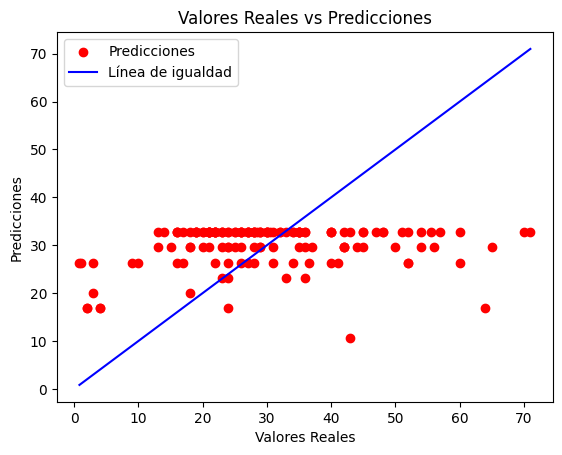

In [ ]:
# Crear la columna 'Familia' sumando 'Parch' y 'SibSp'
oCleanData['Familia'] = oCleanData['Parch'] + oCleanData['SibSp']

# Dividir los datos en conjuntos de entrenamiento y prueba usando la nueva columna 'Familia'
train_x, test_x, train_y, test_y = train_test_split(oCleanData[["Familia"]], oCleanData["Age"], test_size=0.2)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(train_x, train_y)

# Realizar predicciones
y_pred = model.predict(test_x)

# Evaluar el modelo
mse = mean_squared_error(test_y, y_pred)
print("Mean Squared Error: ", mse)

# Graficar las predicciones vs los valores reales
plt.scatter(test_y, y_pred, color='red', label='Predicciones')
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], color ='blue', label = "Línea de igualdad")
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.legend()
plt.show()

## Regresion lineal (Con tres variables Parch, SibSp y Familia)

<ipython-input-162-77c5f1da2f78>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oCleanData['Familia'] = oCleanData['Parch'] + oCleanData['SibSp']


Mean Squared Error:  154.87431309036333
R^2 Score:  0.16466664449727098


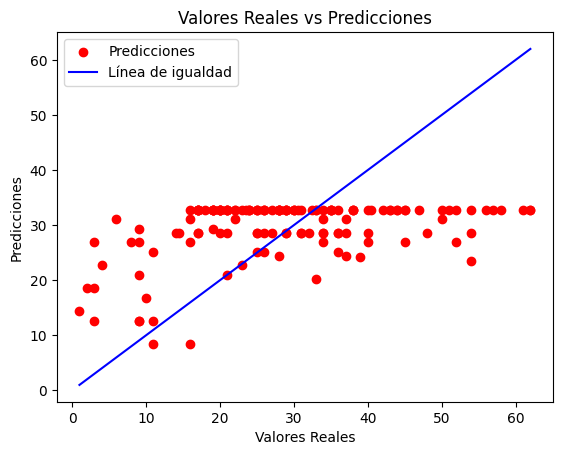

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear la columna 'Familia' sumando 'Parch' y 'SibSp'
oCleanData['Familia'] = oCleanData['Parch'] + oCleanData['SibSp']
# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(oCleanData[["Parch", "SibSp", "Familia"]])

# Dividir los datos en conjuntos de entrenamiento y prueba
train_x, test_x, train_y, test_y = train_test_split(scaled_data, oCleanData["Age"], test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(train_x, train_y)

# Realizar predicciones
y_pred = model.predict(test_x)

# Evaluar el modelo
mse = mean_squared_error(test_y, y_pred)
r2 = r2_score(test_y, y_pred)
print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

# Graficar las predicciones vs los valores reales
plt.scatter(test_y, y_pred, color='red', label='Predicciones')
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], color ='blue', label = "Línea de igualdad")
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.legend()
plt.show()

### Grafica de If Age vs Age

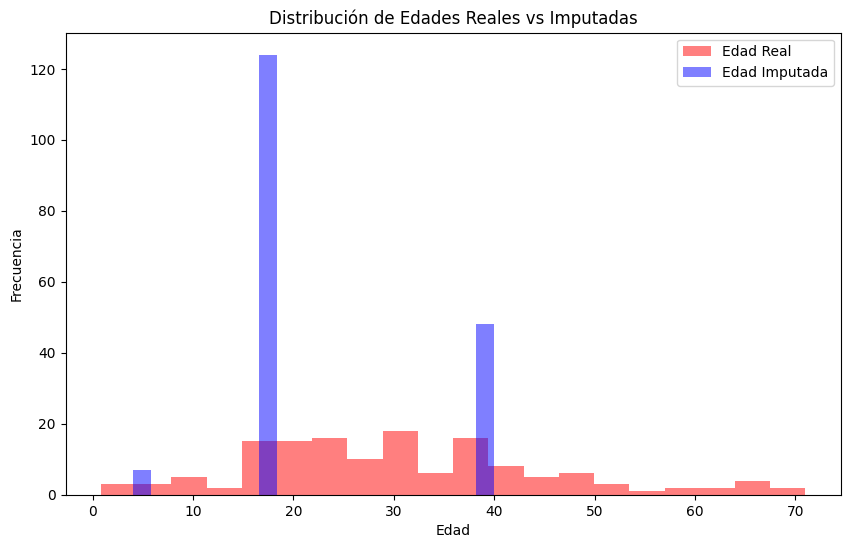

In [ ]:
# Función para asignar la edad según las condiciones
def asignar_edad(row):
    if not pd.isna(row['Age']):  # Verifica si el valor de 'Age' no está en blanco
        if row['Parch'] >= 3 or row['Pclass'] == 1:
            return 40
        elif ('Master' in row['Name'] or row['SibSp'] >= 2) and row['Pclass'] == 3:
            return 4
        elif (row['Parch'] == 0 or row['SibSp'] <= 1) and row['Pclass'] == 3:
            return 18
    return 18  # Valor predeterminado si no se cumple ninguna condición

# Aplicar la función a los datos de prueba
test_data['If_Age'] = test_data.apply(asignar_edad, axis=1)

# Graficar la distribución de las edades reales e imputadas en un gráfico de barras
plt.figure(figsize=(10, 6))

# Distribución de edades reales
plt.hist(test_data['Age'], bins=20, alpha=0.5, color='red', label='Edad Real')

# Distribución de edades imputadas
plt.hist(test_data['If_Age'], bins=20, alpha=0.5, color='blue', label='Edad Imputada')

# Añadir etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades Reales vs Imputadas')
plt.legend()

# Mostrar la gráfica
plt.show()


### Grafica de Vecinos Age vs Age

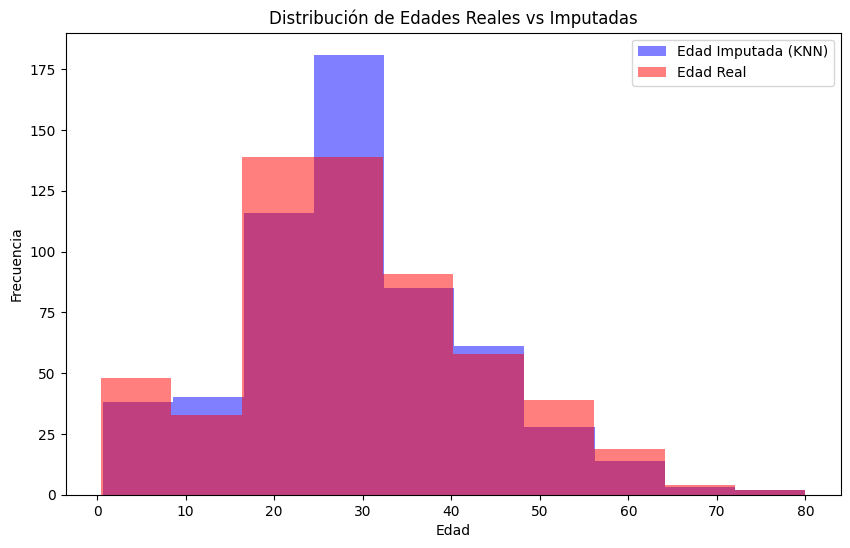

In [ ]:
# Preparar los datos para la imputación (solo en el conjunto de entrenamiento)
data_for_imputation = train_data[['Pclass', 'SibSp', 'Parch', 'Age']]

# Aplicar KNNImputer en el conjunto de entrenamiento
imputer = KNNImputer(n_neighbors=4)
imputed_train_data = imputer.fit_transform(data_for_imputation)

# Convertir de vuelta a DataFrame y mantener las columnas originales
imputed_train_df = pd.DataFrame(imputed_train_data, columns=data_for_imputation.columns)

# Añadir la columna 'Age_Imputed' con los valores imputados al conjunto de entrenamiento
train_data['Age_Imputed'] = imputed_train_df['Age']

# Graficar los resultados
plt.figure(figsize=(10, 6))

# Gráfico de dispersión de Age contra Age_Imputed con colores diferentes
plt.hist(train_data['Age_Imputed'], color='blue', alpha=0.5, label='Edad Imputada (KNN)')
plt.hist(train_data['Age'], color='red', alpha=0.5, label='Edad Real')

# Añadir etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades Reales vs Imputadas')
plt.legend()

# Mostrar la gráfica
plt.show()

## Frecuencia de edades de 0 - 17, 18 - 39 y 40 - en adelante

In [ ]:
# Calcular la frecuencia de todas las edades reales
age_frequencies = oCleantest_data['Age'].value_counts().sort_index()
print("Frecuencia de edades reales:")
print(age_frequencies)

# Crear una lista de edades aleatorias basadas en la frecuencia de las edades reales
def generate_weighted_random_age(age, age_frequencies):
    if np.isnan(age):
        return None

    # Definir los rangos de edad
    if 0 <= age <= 17:
        range_start, range_end = 0, 17
    elif 18 <= age <= 39:
        range_start, range_end = 18, 39
    elif 40 <= age <= 80:
        range_start, range_end = 40, 80
    else:
        return None

    # Crear una lista de edades posibles y sus pesos
    possible_ages = list(range(range_start, range_end + 1))
    weights = [age_frequencies.get(age, 0) for age in possible_ages]

    # Generar una edad aleatoria basada en los pesos
    if sum(weights) > 0:
        random_age = np.random.choice(possible_ages, p=np.array(weights) / sum(weights))
        return random_age
    else:
        return np.random.randint(range_start, range_end + 1)

# Asignar una edad aleatoria basada en las frecuencias individuales
random_ages = []
age_range_labels = []

for age in oCleantest_data['Age']:
    random_age = generate_weighted_random_age(age, age_frequencies)
    random_ages.append(random_age)

    if 0 <= age <= 17:
        age_range_labels.append(1)  # 1 para niños
    elif 18 <= age <= 39:
        age_range_labels.append(2)  # 2 para adultos jóvenes
    elif 40 <= age <= 80:
        age_range_labels.append(3)  # 3 para adultos mayores
    else:
        age_range_labels.append('Fuera de rango')

# Agregar las edades aleatorias y los códigos de rango al DataFrame
oCleantest_data['Prediccion'] = random_ages
oCleantest_data['GrupoAge_Real'] = age_range_labels

# Convertir la columna 'Prediccion' en grupos de edades discretos, manejando valores NaN
oCleantest_data['GrupoAge_Prediccion'] = pd.cut(oCleantest_data['Prediccion'], bins=[0, 17, 39, 80], labels=[1, 2, 3], right=True)

# Eliminar filas con valores NaN en 'GrupoAge_Prediccion' o 'GrupoAge_Real' antes de calcular la matriz de confusión
oCleantest_data_filtered = oCleantest_data.dropna(subset=['GrupoAge_Prediccion', 'GrupoAge_Real'])

# Guardar el DataFrame en un archivo CSV
oCleantest_data_filtered.to_csv('EdadRandom.csv', index=False)


Frecuencia de edades reales:
Age
1.0     1
2.0     1
3.0     3
4.0     1
6.0     1
8.0     1
9.0     5
10.0    1
11.0    3
14.0    1
14.5    1
16.0    4
17.0    7
18.0    1
19.0    6
20.0    6
21.0    6
22.0    3
23.0    2
23.5    1
24.0    3
25.0    6
26.0    5
27.0    2
28.0    6
29.0    6
30.0    3
30.5    1
31.0    3
32.0    1
32.5    1
33.0    3
34.0    5
35.0    4
36.0    4
37.0    3
38.0    3
39.0    1
40.0    3
40.5    1
42.0    1
43.0    2
44.0    2
45.0    3
47.0    1
48.0    1
50.0    2
51.0    1
52.0    2
54.0    3
56.0    1
57.0    1
58.0    1
61.0    1
62.0    2
Name: count, dtype: int64


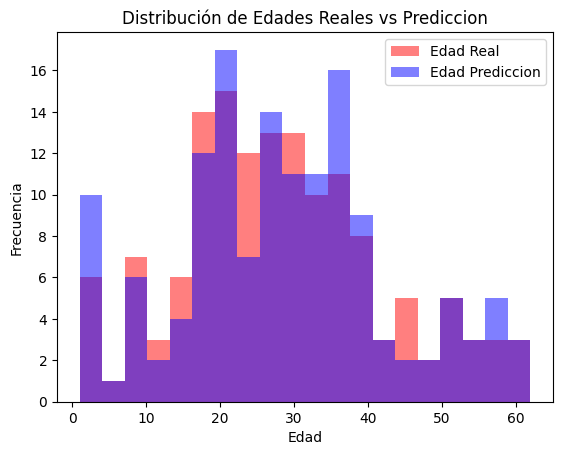

In [ ]:
# Distribución de edades reales
plt.hist(oCleantest_data['Age'], bins=20, alpha=0.5, color='red', label='Edad Real')

# Distribución de edades imputadas
plt.hist(oCleantest_data['Prediccion'], bins=20, alpha=0.5, color='blue', label='Edad Prediccion')

# Añadir etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades Reales vs Prediccion')
plt.legend()

# Mostrar la gráfica
plt.show()

## Matriz de confusion

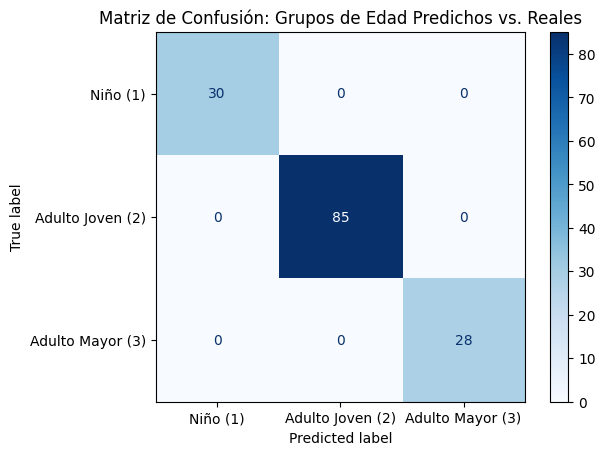

In [ ]:
# Calcular la matriz de confusión entre los grupos de edad discretizados y 'Age_Range'
cm = confusion_matrix(oCleantest_data_filtered['GrupoAge_Prediccion'], oCleantest_data_filtered['GrupoAge_Real'])

# Crear y mostrar la gráfica de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Niño (1)", "Adulto Joven (2)", "Adulto Mayor (3)"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión: Grupos de Edad Predichos vs. Reales')
plt.show()